# Intro Machine Learning

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("../ficheros/Diamonds_Prices2022.csv",index_col =0)

In [6]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Qué es cada una de nuestras variables
- carat = Quilate
- cut = tipo de corte
- color = color
- clarity = transparencia
- depth =  porcentaje de profundidad
- table = base
- price = precio $
- x = altura
- y = anchura
- z = profundidad

Nuestra columna respuesta será **price**

In [7]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [8]:
df.shape # tiene 53943 filas y 10 columnas

(53943, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53943 entries, 1 to 53943
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53943 non-null  float64
 1   cut      53943 non-null  object 
 2   color    53943 non-null  object 
 3   clarity  53943 non-null  object 
 4   depth    53943 non-null  float64
 5   table    53943 non-null  float64
 6   price    53943 non-null  int64  
 7   x        53943 non-null  float64
 8   y        53943 non-null  float64
 9   z        53943 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Tenemos 3 columnas categoricas y 7 columnas numéricas

In [10]:
df.isnull().sum() # comprobamos que no hay nulos

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
df.describe().T # comprobamos primero las numéricas

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
x,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
y,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
z,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


In [12]:
df.describe(include="object").T # ahora hacemos el describe para las categóricas

,count,unique,top,freq
cut,53943,5,Ideal,21551
color,53943,7,G,11292
clarity,53943,8,SI1,13067


In [13]:
df.duplicated().sum()

149

In [14]:
# vamos a proceder a eliminar los duplicados
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum() # comprobamos que se hayan eliminado

0

In [16]:
df.shape    # ahora nos hemos quedado con 53794 filas

(53794, 10)

### Detectando outliers

In [17]:
# Hacemos un nuevo dataframe con las columnas numéricas
df_numericas = df.select_dtypes(include= np.number)
df_numericas.head(2)

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31


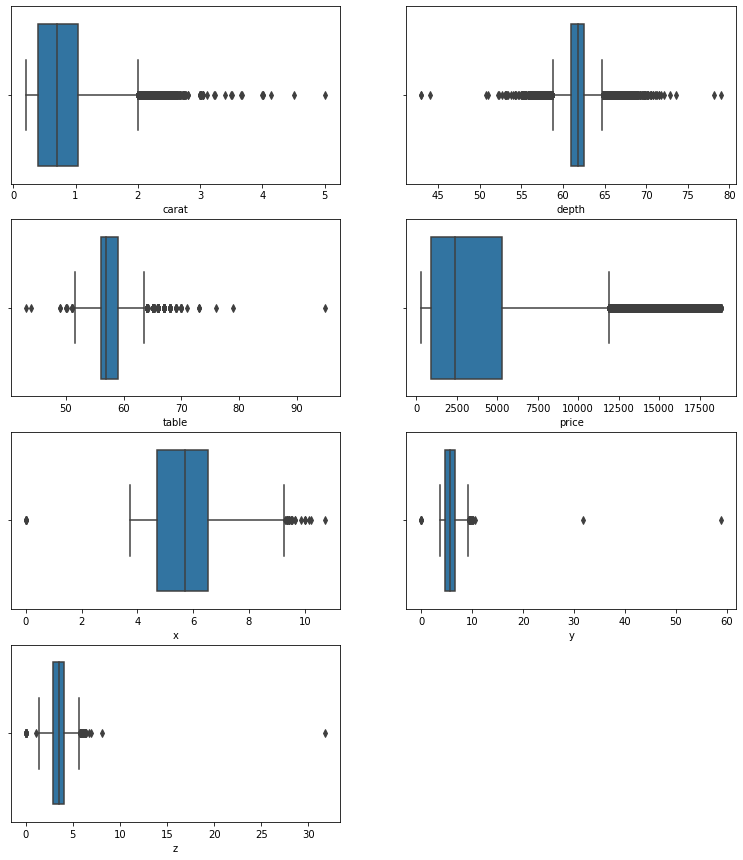

In [18]:
# Con boxplot vemos visualmente los outliers
fig, axes = plt.subplots(4,2, figsize = (13,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x = df_numericas[columna], data= df, ax= axes[indice])
    
fig.delaxes(axes[-1]);


In [19]:
# Comprobamos la correlación para poder decidir mejor qué hacemos con ellos
df_numericas.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


In [20]:
# Función para detectar los outliers
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 

   
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices

Como tenemos muchos datos, vamos a crear un df sin los aoutliers de la columna price, ya que es nuestra variable respuesta

In [21]:
index_price = detectar_outliers(["price"], df)

In [22]:
len(index_price["price"])

3523

In [23]:
# Creamos una lista para pasarla en el drop
lista_indice = index_price["price"]

In [24]:
df_price_sin_outliers = df.drop(lista_indice, axis = 0)

In [25]:
df_price_sin_outliers.shape # Comprobamos la forma

(50271, 10)

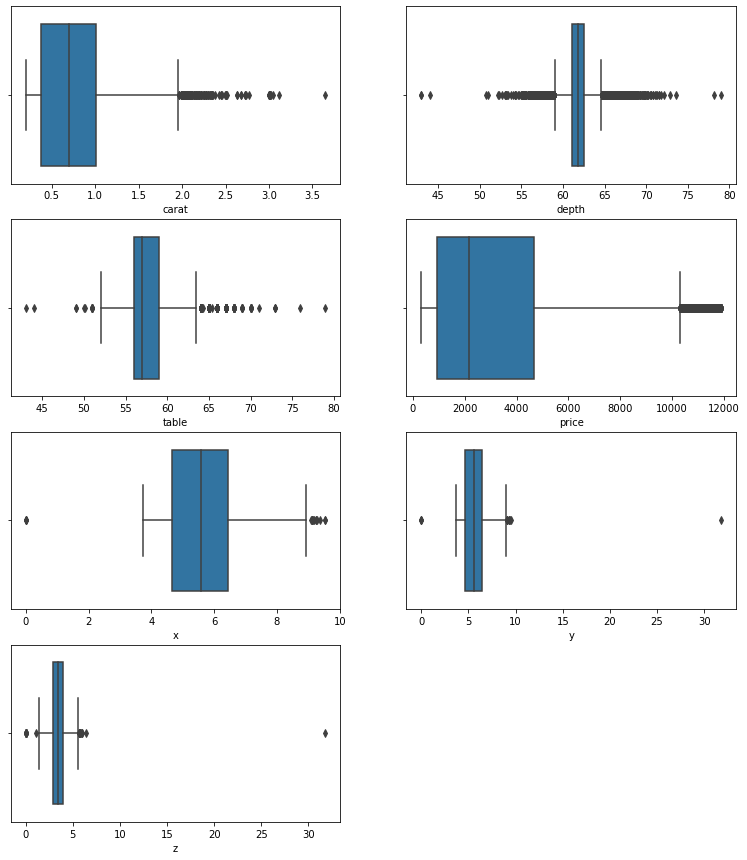

In [26]:
# Hacemos otro boxplot para ver cómo va quedando
fig, axes = plt.subplots(4,2, figsize = (13,15))
axes = axes.flat 

for indice, columna in enumerate(df_price_sin_outliers.select_dtypes(include = np.number).columns):
    sns.boxplot(x = df_price_sin_outliers[columna], data= df, ax= axes[indice])
    
fig.delaxes(axes[-1]);


Como tenemos todavía algún outlier muy exagerado en las variables z e y, los eliminamos

In [27]:
index_z = detectar_outliers(["z", "y"], df_price_sin_outliers)

In [28]:
lista_borrar = index_z["z"] + index_z["y"]

In [29]:
df_sin_outliers = df_price_sin_outliers.drop(lista_borrar, axis= 0)

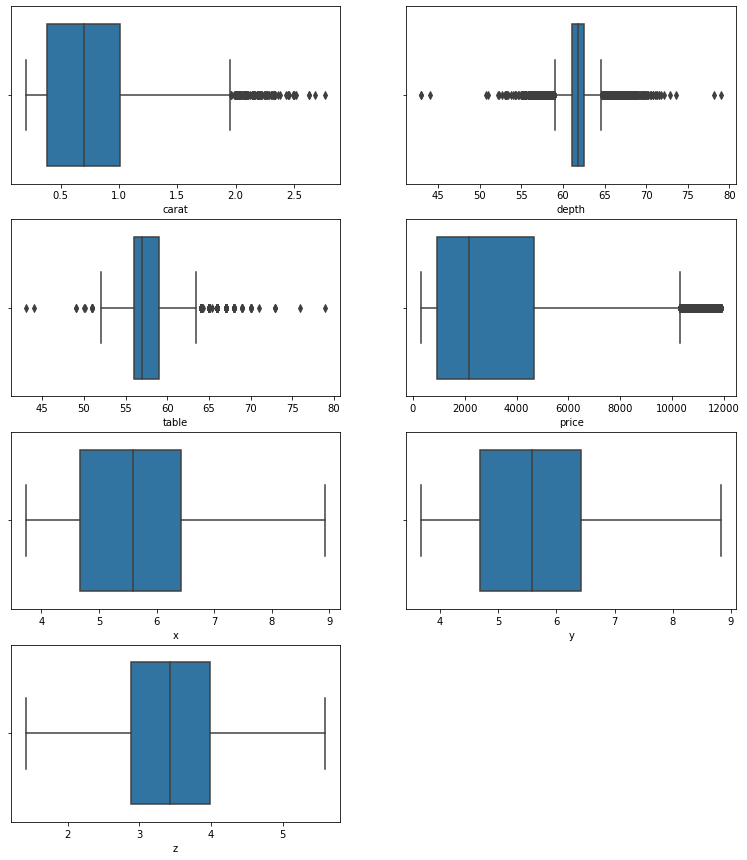

In [30]:
fig, axes = plt.subplots(4,2, figsize = (13,15))
axes = axes.flat 

for indice, columna in enumerate(df_sin_outliers.select_dtypes(include = np.number).columns):
    sns.boxplot(x = df_sin_outliers[columna], data= df_sin_outliers, ax= axes[indice])
    
fig.delaxes(axes[-1]);

Seguimos teniendo outliers en algunas columnas, pero si los eliminamos puede que eliminemos datos de valor, por lo que decidimos dejarlos de momento.

A contnuacion  hacemos una grafica para ver la relación entrelas variables predicctoras y la variable respuesta

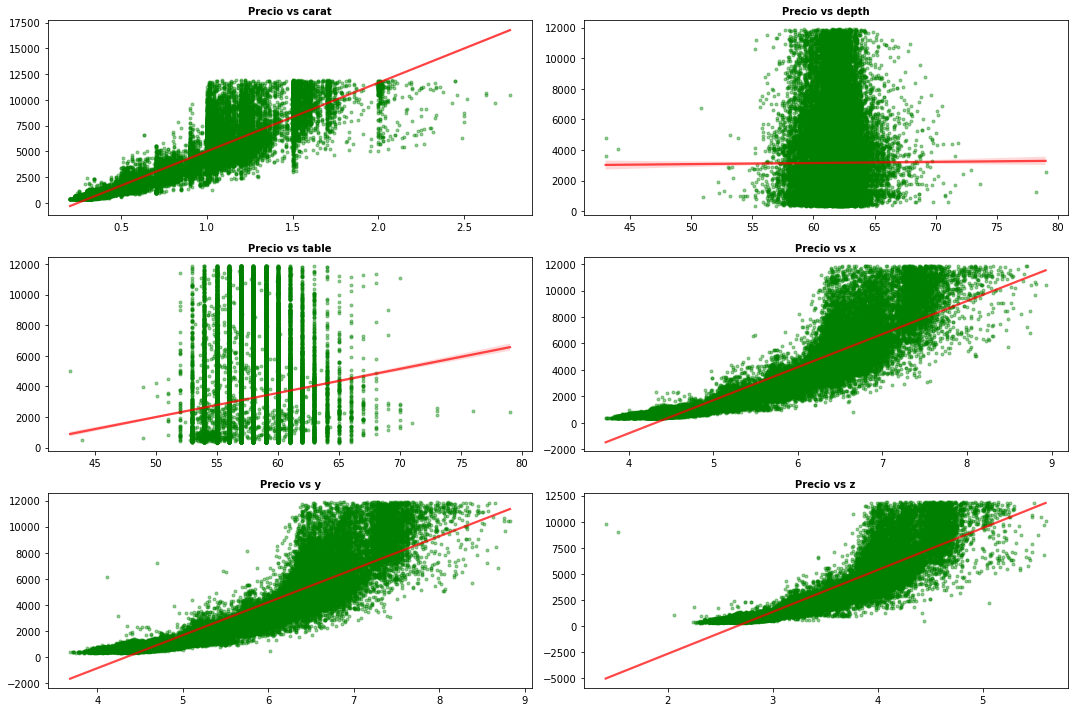

In [31]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 10))
axes = axes.flat
columnas_numeric = df_sin_outliers.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")
for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df_sin_outliers[colum],
        y = df_sin_outliers["price"],
        color = "green",
        marker = ".",
        scatter_kws = {"alpha": 0.4},
        line_kws = {"color": "red", "alpha": 0.7 },
        ax = axes[i])
    axes[i].set_title(f"Precio vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
fig.tight_layout();

Tanto el *carat* como la *x*, *y* , *z* parecen influir en el precio. Cuanto mayores son, mayor será el precio. Vemos que, sin embargo, el *depth* no influye en el precio, y el *table* tampoco.

<AxesSubplot:>

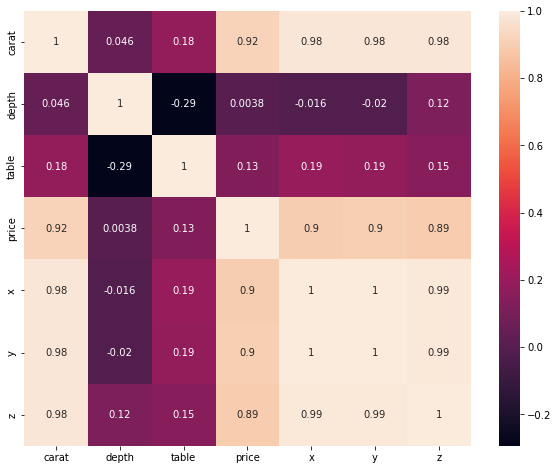

In [32]:
sns.heatmap(df_sin_outliers.corr(), annot=True)

Y con este heatmap, confirmarmos las relaciones que ya habiamos expuesto anteriormente

In [33]:
df_price_sin_outliers.to_csv("../ficheros/diamons_01.csv")